# TFS - Task3 - To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

In [40]:
# lets import the importent liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Lets import the dataset
df = pd.read_csv("iris.csv")
print("Data import Successfully")

Data import Successfully


In [42]:
# Dataset Sample
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
df.shape

(150, 6)

In [44]:
# lets print the shape of data
print('shape of data(rows & columns) = {}'.format(df.shape))

shape of data(rows & columns) = (150, 6)


# K-Means clustering


finding optimal no of clusters by elbow method

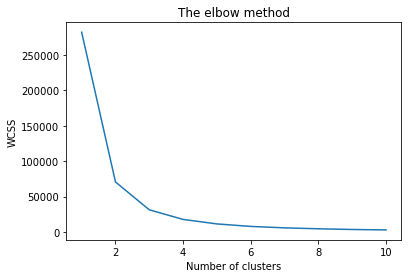

In [45]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')

# Within cluster sum of squares
plt.ylabel('WCSS') 
plt.show()

In [46]:
# Lets check the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [47]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [48]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [49]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [50]:
#remove unwanted data
#df = df.drop("Id",axis=1 )
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


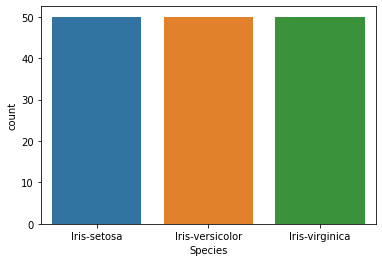

In [51]:
# Show the Species in barplot
sns.countplot('Species',data=df)
plt.show()

# Data Analysis via Data Virualization

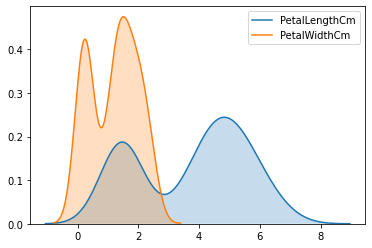

In [52]:
#variation of petallength petal width of flowers.
sns.kdeplot(data=df['PetalLengthCm'], shade=True)
sns.kdeplot(data=df['PetalWidthCm'], shade=True)

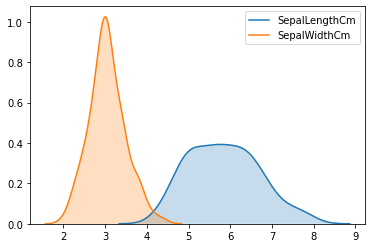

In [53]:
sns.kdeplot(data=df['SepalLengthCm'], shade=True)
sns.kdeplot(data=df['SepalWidthCm'], shade=True)

In [54]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

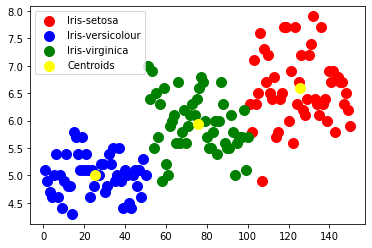

In [55]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [56]:
#lets import some statics functions
from scipy import stats

In [57]:
fitted_data, fitted_lambda = stats.boxcox(df['SepalLengthCm'])

In [58]:
fitted_data = fitted_data.reshape(150,-1)
df['SepalLengthCm'] = fitted_data

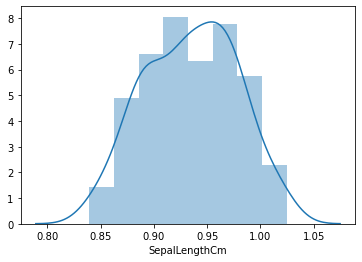

In [59]:
sns.distplot(np.log1p(df['SepalLengthCm']))

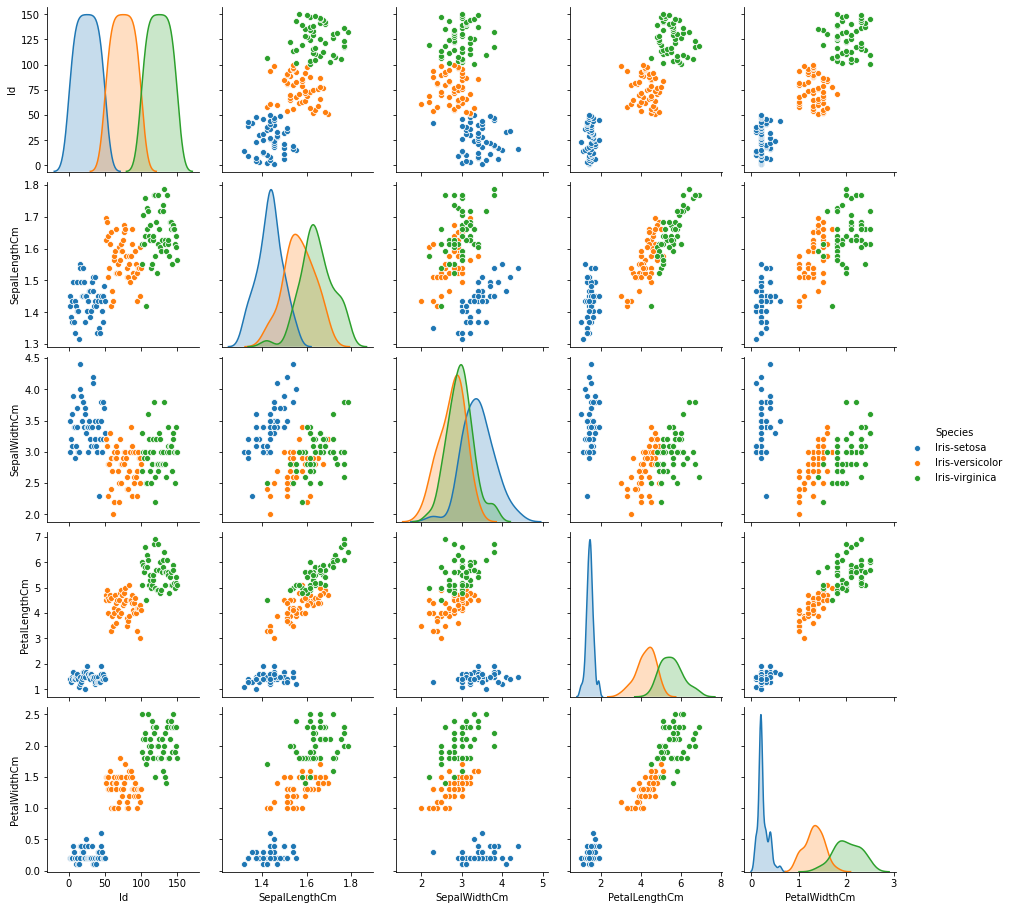

In [60]:
#complete visualization of data seprated by species
sns.pairplot(df,hue='Species')

# THANK YOU